# **Importing Resources**

In [0]:
from fastai import *
from fastai.vision import *
import os

**Mounting the drive to save my trained models permanently on my google drive.**

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Creating folders in drive to save the models at various checkpoints**

In [0]:
# os.mkdir('/content/drive/My Drive/fastai-v3/data/car classification')
path_data = Path('/content/drive/My Drive/fastai-v3/data/car classification')
# os.mkdir('/content/drive/My Drive/fastai-v3/data/car classification/models')
path_model = path_data/'models'

**untar_data** function downloads the data and untars/unzips it. It returns the path where the data is being downloaded to.

In [0]:
path = Path('/content/Archive2')
# path.mkdir()

In [0]:
!unzip -q '/content/drive/My Drive/Archive2.zip' -d '/content/Archive2'

In [0]:
path.ls() # returns the list of paths of all the items in the given path

[PosixPath('/content/Archive2/__MACOSX'),
 PosixPath('/content/Archive2/training'),
 PosixPath('/content/Archive2/validation')]

# **Creating the Dataloaders**

In [0]:
np.random.seed(40)
data = (ImageList.from_folder(path).
        split_by_folder(train = 'training', valid = 'validation').
        label_from_folder().
        transform(get_transforms(),size = 224).
        databunch(bs = 256).
        normalize(imagenet_stats))

In [0]:
data.classes

['00-damage', '01-whole']

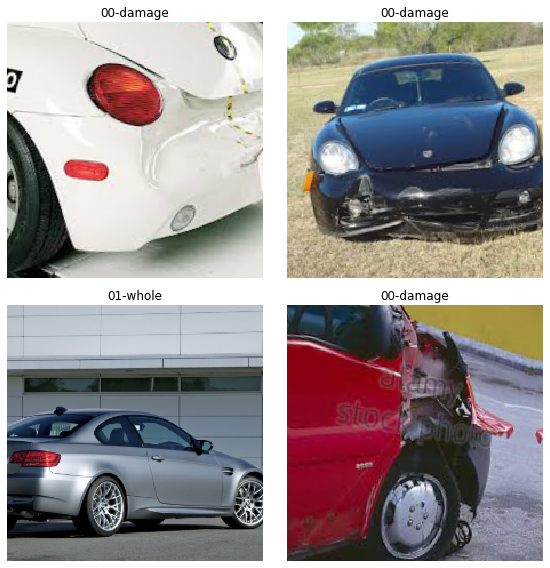

In [0]:
data.show_batch(2)

# **Creating and training the model**

We begin with a **resnet34** model pretrained on Imagenet data


In [0]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics = accuracy, ps=0.2)

In [0]:
torch.save(learn.model.state_dict(), path_model/'carsdict.pth')

In [0]:
type(arch)

function

We freeze the model and find an optimum learning rate. By freezing,we mean, we don't calculate and update the gradients of initial layers but just the last layers.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-04
Min loss divided by 10: 2.51E-02


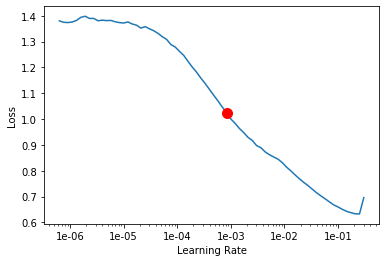

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [0]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr) )# ps 2

epoch,train_loss,valid_loss,accuracy,time
0,0.779060,0.675868,0.763043,00:37
1,0.545897,0.427633,0.889130,00:38
2,0.442170,0.236277,0.917391,00:37
3,0.375253,0.196038,0.930435,00:37
4,0.335130,0.188170,0.930435,00:38


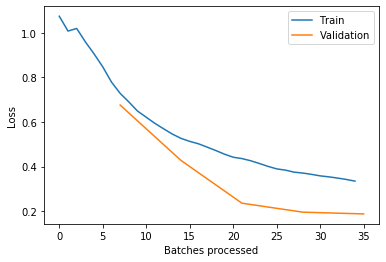

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save(path_model/'stage-1-frozen-rn34')
# learn.load(path_model/'stage-1-frozen-rn34')

We now load our previously trained model that we saved in the drive.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-04
Min loss divided by 10: 1.45E-04


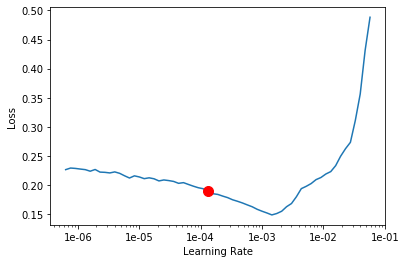

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [0]:
learn.fit_one_cycle(10, slice(1e-5, 1e-4) )

epoch,train_loss,valid_loss,accuracy,time
0,0.238573,0.186480,0.930435,00:37
1,0.223689,0.181969,0.930435,00:38
2,0.207694,0.178341,0.926087,00:38
3,0.185317,0.165471,0.934783,00:38
4,0.163120,0.147695,0.943478,00:38
5,0.143310,0.142309,0.939130,00:38
6,0.131315,0.142670,0.939130,00:37
7,0.118076,0.142442,0.939130,00:39
8,0.105777,0.142136,0.939130,00:39
9,0.097836,0.142120,0.939130,00:39


In [0]:
# learn.save(path_model/'stage-2-unfrozen-rn34')
learn.load(path_model/'stage-2-unfrozen-rn34')

We unfreeze the entire model and find the optimum lr.

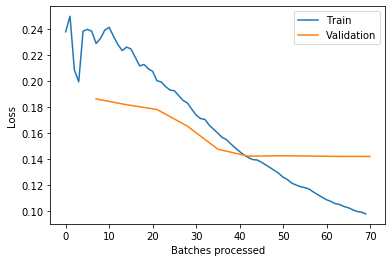

In [0]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

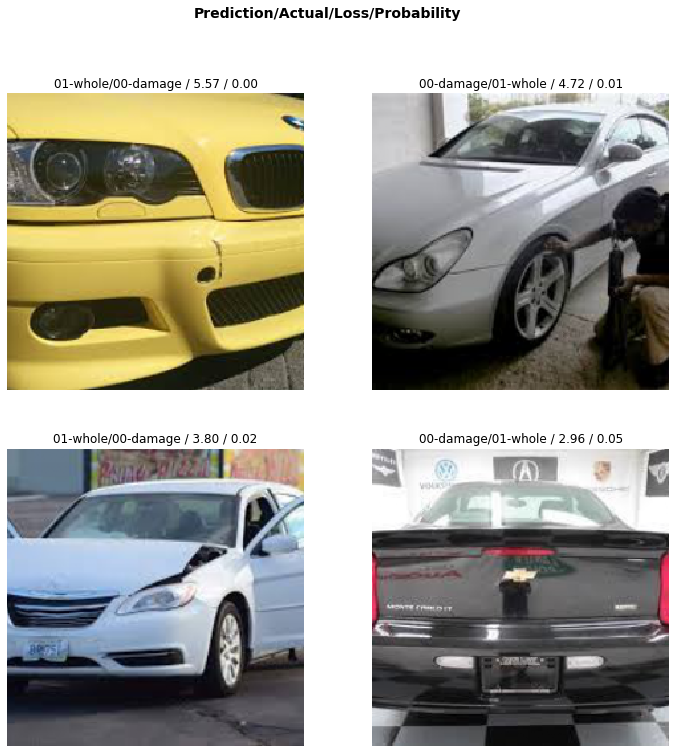

In [0]:
interp.plot_top_losses(4)

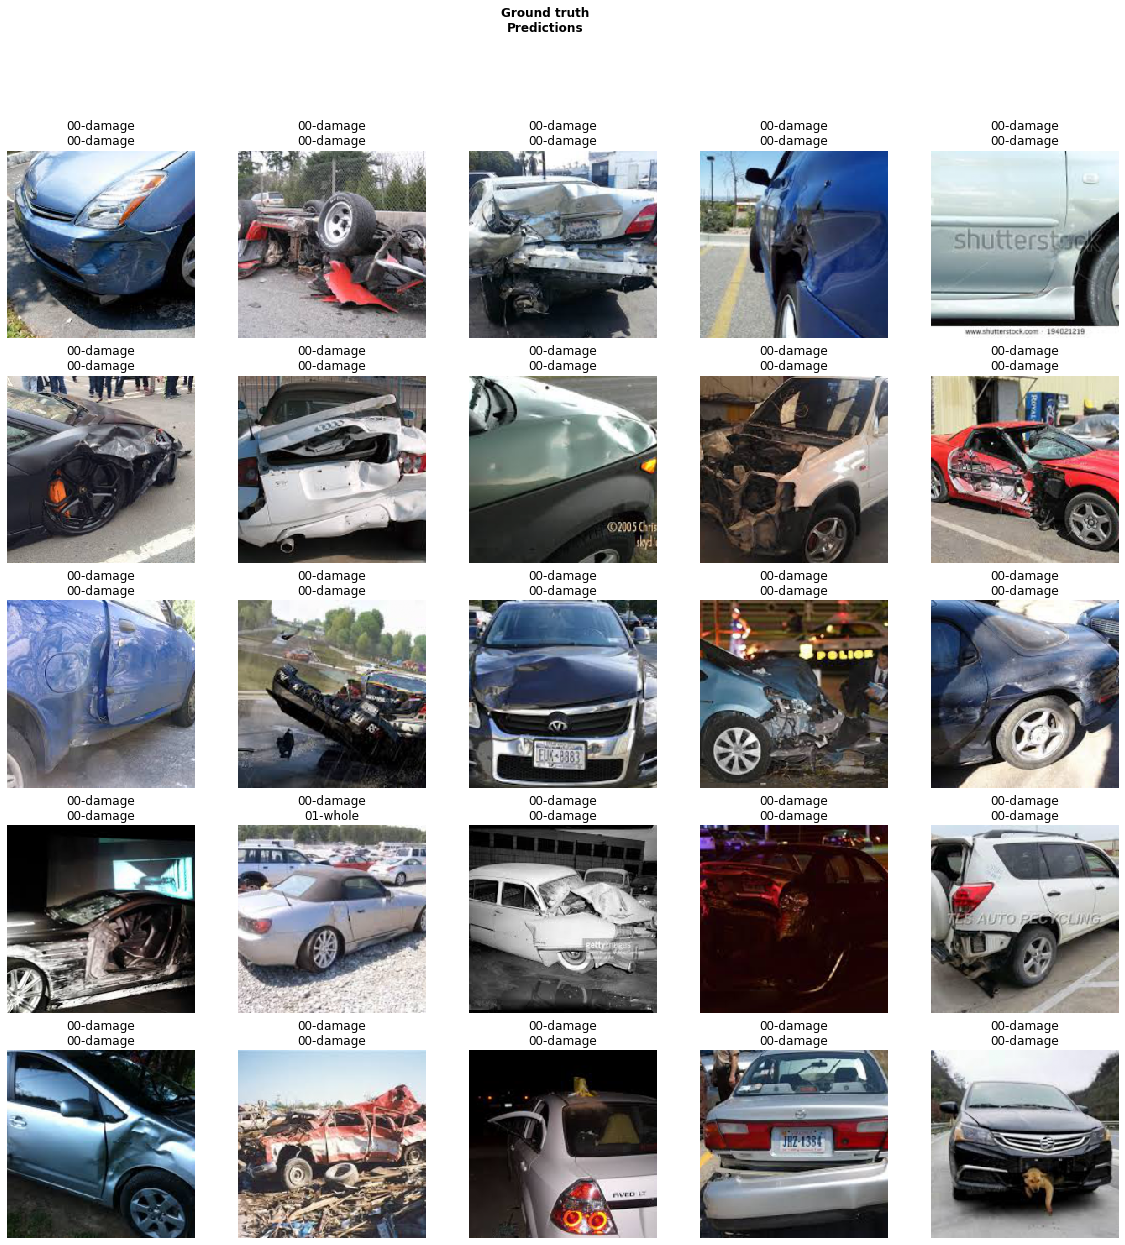

In [0]:
learn.show_results()